In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [4]:
df.isnull().sum()/df.shape[0]*100

age         0.0
sex         0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalach     0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
target      0.0
dtype: float64

<Axes: >

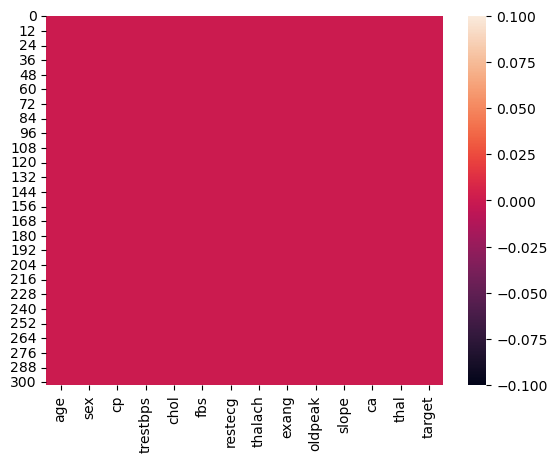

In [5]:
sb.heatmap(df.isnull())

In [6]:
df.duplicated().sum()

1

In [7]:
df[df.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df['target'].value_counts()

1    164
0    138
Name: target, dtype: int64

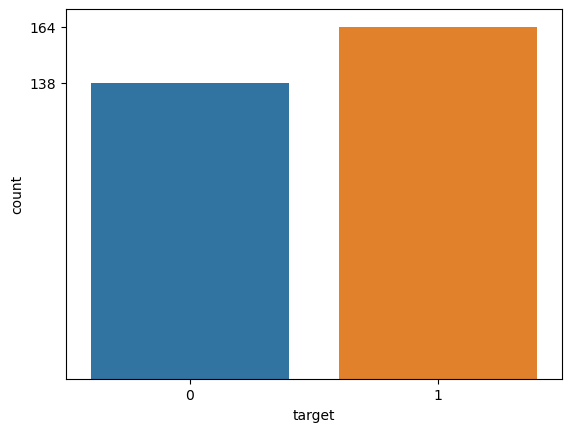

In [10]:
sb.countplot(data=df,x='target')
f=df['target'].value_counts()
plt.yticks(f)
plt.show()

In [11]:
X=df.drop('target',axis=1)
Y=df['target']

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [14]:
X_train.shape

(211, 13)

In [15]:
Y_train.shape

(211,)

In [16]:
X_test.shape

(91, 13)

In [17]:
Y_test.shape

(91,)

In [18]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [19]:
X_train

array([[-1.06167727, -1.55023411,  1.02938967, ..., -0.69616283,
         0.27995117, -0.51005185],
       [ 0.43317242,  0.64506386, -0.92737808, ...,  0.95429062,
        -0.72123014,  1.12056846],
       [ 0.43317242, -1.55023411, -0.92737808, ..., -0.69616283,
         1.28113248, -2.14067216],
       ...,
       [-2.66330193,  0.64506386,  0.05100579, ...,  0.95429062,
        -0.72123014, -0.51005185],
       [ 0.43317242,  0.64506386, -0.92737808, ...,  0.95429062,
         1.28113248,  1.12056846],
       [ 0.00607251,  0.64506386,  1.02938967, ...,  0.95429062,
        -0.72123014,  1.12056846]])

In [20]:
X_test.shape

(91, 13)

In [21]:
#create a user define function :passing argument and returning  value
def create_model(model):
    model.fit(X_train,Y_train) #rtrain model with 70% of data
    y_pred=model.predict(X_test) #test the model with 30% of data
    #generate rport 
    print(classification_report(Y_test,y_pred))
#confusion matrix
    print(confusion_matrix(Y_test,y_pred))
    return model


In [22]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [23]:
from sklearn.metrics import classification_report,confusion_matrix


In [24]:
lr=create_model(lr)

              precision    recall  f1-score   support

           0       0.77      0.79      0.78        38
           1       0.85      0.83      0.84        53

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91

[[30  8]
 [ 9 44]]


In [25]:
from sklearn.tree import DecisionTreeClassifier  #decision Tree

In [26]:
dtc=DecisionTreeClassifier()

In [27]:
for i in range(1,101):
    dtc=DecisionTreeClassifier(random_state=i)
    print('random state',i)
    dtc=create_model(dtc)

random state 1
              precision    recall  f1-score   support

           0       0.65      0.79      0.71        38
           1       0.82      0.70      0.76        53

    accuracy                           0.74        91
   macro avg       0.74      0.74      0.73        91
weighted avg       0.75      0.74      0.74        91

[[30  8]
 [16 37]]
random state 2
              precision    recall  f1-score   support

           0       0.65      0.79      0.71        38
           1       0.82      0.70      0.76        53

    accuracy                           0.74        91
   macro avg       0.74      0.74      0.73        91
weighted avg       0.75      0.74      0.74        91

[[30  8]
 [16 37]]
random state 3
              precision    recall  f1-score   support

           0       0.64      0.79      0.71        38
           1       0.82      0.68      0.74        53

    accuracy                           0.73        91
   macro avg       0.73      0.73      0.72  

              precision    recall  f1-score   support

           0       0.61      0.79      0.69        38
           1       0.81      0.64      0.72        53

    accuracy                           0.70        91
   macro avg       0.71      0.72      0.70        91
weighted avg       0.73      0.70      0.70        91

[[30  8]
 [19 34]]
random state 26
              precision    recall  f1-score   support

           0       0.68      0.79      0.73        38
           1       0.83      0.74      0.78        53

    accuracy                           0.76        91
   macro avg       0.76      0.76      0.76        91
weighted avg       0.77      0.76      0.76        91

[[30  8]
 [14 39]]
random state 27
              precision    recall  f1-score   support

           0       0.64      0.76      0.70        38
           1       0.80      0.70      0.75        53

    accuracy                           0.73        91
   macro avg       0.72      0.73      0.72        91
weig

              precision    recall  f1-score   support

           0       0.64      0.79      0.71        38
           1       0.82      0.68      0.74        53

    accuracy                           0.73        91
   macro avg       0.73      0.73      0.72        91
weighted avg       0.74      0.73      0.73        91

[[30  8]
 [17 36]]
random state 58
              precision    recall  f1-score   support

           0       0.63      0.76      0.69        38
           1       0.80      0.68      0.73        53

    accuracy                           0.71        91
   macro avg       0.72      0.72      0.71        91
weighted avg       0.73      0.71      0.72        91

[[29  9]
 [17 36]]
random state 59
              precision    recall  f1-score   support

           0       0.60      0.76      0.67        38
           1       0.79      0.64      0.71        53

    accuracy                           0.69        91
   macro avg       0.70      0.70      0.69        91
weig

              precision    recall  f1-score   support

           0       0.65      0.79      0.71        38
           1       0.82      0.70      0.76        53

    accuracy                           0.74        91
   macro avg       0.74      0.74      0.73        91
weighted avg       0.75      0.74      0.74        91

[[30  8]
 [16 37]]
random state 86
              precision    recall  f1-score   support

           0       0.65      0.79      0.71        38
           1       0.82      0.70      0.76        53

    accuracy                           0.74        91
   macro avg       0.74      0.74      0.73        91
weighted avg       0.75      0.74      0.74        91

[[30  8]
 [16 37]]
random state 87
              precision    recall  f1-score   support

           0       0.67      0.79      0.72        38
           1       0.83      0.72      0.77        53

    accuracy                           0.75        91
   macro avg       0.75      0.75      0.75        91
weig

In [28]:
dict={"Features":X.columns,'Information_Gain':dtc.feature_importances_}


df1=pd.DataFrame(dict)
df1

,Features,Information_Gain
0,age,0.085167
1,sex,0.020339
2,cp,0.317338
3,trestbps,0.038892
4,chol,0.120318
5,fbs,0.000000
6,restecg,0.022177
7,thalach,0.060615
8,exang,0.081387
9,oldpeak,0.070948


In [29]:
for i in range(1,9):
    dtc1=DecisionTreeClassifier(random_state=1,max_depth=i) #decision Tree max depth
    print("Max Depth",i)
    dtc1=create_model(dtc1)

Max Depth 1
              precision    recall  f1-score   support

           0       0.63      0.68      0.66        38
           1       0.76      0.72      0.74        53

    accuracy                           0.70        91
   macro avg       0.70      0.70      0.70        91
weighted avg       0.71      0.70      0.70        91

[[26 12]
 [15 38]]
Max Depth 2
              precision    recall  f1-score   support

           0       0.61      0.71      0.66        38
           1       0.77      0.68      0.72        53

    accuracy                           0.69        91
   macro avg       0.69      0.69      0.69        91
weighted avg       0.70      0.69      0.69        91

[[27 11]
 [17 36]]
Max Depth 3
              precision    recall  f1-score   support

           0       0.68      0.68      0.68        38
           1       0.77      0.77      0.77        53

    accuracy                           0.74        91
   macro avg       0.73      0.73      0.73        91


In [30]:
for i in range(45,101):
    dtc2=DecisionTreeClassifier(random_state=1,min_samples_leaf=i) #min sample leaf
    print("Max Depth",i)
    dtc2=create_model(dtc2)

Max Depth 45
              precision    recall  f1-score   support

           0       0.63      0.68      0.66        38
           1       0.76      0.72      0.74        53

    accuracy                           0.70        91
   macro avg       0.70      0.70      0.70        91
weighted avg       0.71      0.70      0.70        91

[[26 12]
 [15 38]]
Max Depth 46
              precision    recall  f1-score   support

           0       0.63      0.68      0.66        38
           1       0.76      0.72      0.74        53

    accuracy                           0.70        91
   macro avg       0.70      0.70      0.70        91
weighted avg       0.71      0.70      0.70        91

[[26 12]
 [15 38]]
Max Depth 47
              precision    recall  f1-score   support

           0       0.63      0.68      0.66        38
           1       0.76      0.72      0.74        53

    accuracy                           0.70        91
   macro avg       0.70      0.70      0.70        

[[26 12]
 [15 38]]
Max Depth 71
              precision    recall  f1-score   support

           0       0.63      0.68      0.66        38
           1       0.76      0.72      0.74        53

    accuracy                           0.70        91
   macro avg       0.70      0.70      0.70        91
weighted avg       0.71      0.70      0.70        91

[[26 12]
 [15 38]]
Max Depth 72
              precision    recall  f1-score   support

           0       0.63      0.68      0.66        38
           1       0.76      0.72      0.74        53

    accuracy                           0.70        91
   macro avg       0.70      0.70      0.70        91
weighted avg       0.71      0.70      0.70        91

[[26 12]
 [15 38]]
Max Depth 73
              precision    recall  f1-score   support

           0       0.63      0.68      0.66        38
           1       0.76      0.72      0.74        53

    accuracy                           0.70        91
   macro avg       0.70      0.7

In [31]:
for i in range(1,9):
    dtc3=DecisionTreeClassifier(random_state=1,max_depth=i,criterion='entropy') #maxdepth criterion entropy
    print('random_state',i)
    dtc3=create_model(dtc3)

random_state 1
              precision    recall  f1-score   support

           0       0.63      0.68      0.66        38
           1       0.76      0.72      0.74        53

    accuracy                           0.70        91
   macro avg       0.70      0.70      0.70        91
weighted avg       0.71      0.70      0.70        91

[[26 12]
 [15 38]]
random_state 2
              precision    recall  f1-score   support

           0       0.63      0.68      0.66        38
           1       0.76      0.72      0.74        53

    accuracy                           0.70        91
   macro avg       0.70      0.70      0.70        91
weighted avg       0.71      0.70      0.70        91

[[26 12]
 [15 38]]
random_state 3
              precision    recall  f1-score   support

           0       0.69      0.82      0.75        38
           1       0.85      0.74      0.79        53

    accuracy                           0.77        91
   macro avg       0.77      0.78      0.77  

In [32]:
for i in range(45,100):
    dtc4=DecisionTreeClassifier(random_state=1,min_samples_leaf=i,criterion='entropy') #min sample leaf and entropty
    print("random_state",i)
    dtc4=create_model(dtc4)

random_state 45
              precision    recall  f1-score   support

           0       0.63      0.68      0.66        38
           1       0.76      0.72      0.74        53

    accuracy                           0.70        91
   macro avg       0.70      0.70      0.70        91
weighted avg       0.71      0.70      0.70        91

[[26 12]
 [15 38]]
random_state 46
              precision    recall  f1-score   support

           0       0.63      0.68      0.66        38
           1       0.76      0.72      0.74        53

    accuracy                           0.70        91
   macro avg       0.70      0.70      0.70        91
weighted avg       0.71      0.70      0.70        91

[[26 12]
 [15 38]]
random_state 47
              precision    recall  f1-score   support

           0       0.63      0.68      0.66        38
           1       0.76      0.72      0.74        53

    accuracy                           0.70        91
   macro avg       0.70      0.70      0.7

              precision    recall  f1-score   support

           0       0.63      0.68      0.66        38
           1       0.76      0.72      0.74        53

    accuracy                           0.70        91
   macro avg       0.70      0.70      0.70        91
weighted avg       0.71      0.70      0.70        91

[[26 12]
 [15 38]]
random_state 75
              precision    recall  f1-score   support

           0       0.63      0.68      0.66        38
           1       0.76      0.72      0.74        53

    accuracy                           0.70        91
   macro avg       0.70      0.70      0.70        91
weighted avg       0.71      0.70      0.70        91

[[26 12]
 [15 38]]
random_state 76
              precision    recall  f1-score   support

           0       0.63      0.68      0.66        38
           1       0.76      0.72      0.74        53

    accuracy                           0.70        91
   macro avg       0.70      0.70      0.70        91
weig

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
rfc=RandomForestClassifier() #random forest classifier

In [35]:
#bagging feature 1 to 16
# for i in range(1,17):
#     rfc=RandomForestClassifier(max_features=i,random_state=1)
#     print('Max features',i)
#     #call function
#     rfc=create_model(rfc)

In [36]:
rfc=RandomForestClassifier(max_features=1,random_state=1)
rfc=create_model(rfc)

              precision    recall  f1-score   support

           0       0.76      0.76      0.76        38
           1       0.83      0.83      0.83        53

    accuracy                           0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.80      0.80      0.80        91

[[29  9]
 [ 9 44]]


In [37]:
from sklearn.ensemble  import AdaBoostClassifier  #adaboostclassifier
#create an object for AdaBoostClassifier
# ada=AdaBoostClassifier(random_state=1,n_estimators=)
# #hit and try method  for adaboost classifier
# for i in range(1,17):
#     ada=AdaBoostClassifier(random_state=1,n_estimators=i)
#     print("No of estimators:",i)
#     #call function
#     ada=create_model(ada)

In [38]:
 ada=AdaBoostClassifier(random_state=1,n_estimators=16)
ada=create_model(ada)

              precision    recall  f1-score   support

           0       0.76      0.82      0.78        38
           1       0.86      0.81      0.83        53

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.82      0.81      0.81        91

[[31  7]
 [10 43]]


In [39]:
dict5={'Features':X.columns,"Information_Gain":ada.feature_importances_}
df4=pd.DataFrame(dict5)
df4
#sorting values
df4=df4.sort_values(by='Information_Gain',ascending=False)
df4

,Features,Information_Gain
0,age,0.1875
7,thalach,0.1250
10,slope,0.1250
11,ca,0.1250
1,sex,0.0625
2,cp,0.0625
3,trestbps,0.0625
4,chol,0.0625
8,exang,0.0625
9,oldpeak,0.0625


In [40]:
from sklearn.ensemble  import GradientBoostingClassifier #gradient boosting classifier

In [41]:
for i in range(1,40):
    gbc=GradientBoostingClassifier(random_state=1,n_estimators=i)
    print("No of estimators:",i)
    gbc=create_model(gbc)

No of estimators: 1
              precision    recall  f1-score   support

           0       0.68      0.68      0.68        38
           1       0.77      0.77      0.77        53

    accuracy                           0.74        91
   macro avg       0.73      0.73      0.73        91
weighted avg       0.74      0.74      0.74        91

[[26 12]
 [12 41]]
No of estimators: 2
              precision    recall  f1-score   support

           0       0.68      0.68      0.68        38
           1       0.77      0.77      0.77        53

    accuracy                           0.74        91
   macro avg       0.73      0.73      0.73        91
weighted avg       0.74      0.74      0.74        91

[[26 12]
 [12 41]]
No of estimators: 3
              precision    recall  f1-score   support

           0       0.68      0.68      0.68        38
           1       0.77      0.77      0.77        53

    accuracy                           0.74        91
   macro avg       0.73      0

              precision    recall  f1-score   support

           0       0.70      0.74      0.72        38
           1       0.80      0.77      0.79        53

    accuracy                           0.76        91
   macro avg       0.75      0.76      0.75        91
weighted avg       0.76      0.76      0.76        91

[[28 10]
 [12 41]]
No of estimators: 25
              precision    recall  f1-score   support

           0       0.69      0.71      0.70        38
           1       0.79      0.77      0.78        53

    accuracy                           0.75        91
   macro avg       0.74      0.74      0.74        91
weighted avg       0.75      0.75      0.75        91

[[27 11]
 [12 41]]
No of estimators: 26
              precision    recall  f1-score   support

           0       0.68      0.74      0.71        38
           1       0.80      0.75      0.78        53

    accuracy                           0.75        91
   macro avg       0.74      0.75      0.74     

In [42]:
from xgboost import XGBClassifier  #xgboost classifier

In [43]:
xgb=XGBClassifier()

In [47]:
for i in range(1,100):
    xgb=XGBClassifier(random_state=1,n_estimators=i)
    print("number",i)
    xgb=create_model(xgb)

number 1
              precision    recall  f1-score   support

           0       0.73      0.79      0.76        38
           1       0.84      0.79      0.82        53

    accuracy                           0.79        91
   macro avg       0.79      0.79      0.79        91
weighted avg       0.79      0.79      0.79        91

[[30  8]
 [11 42]]
number 2
              precision    recall  f1-score   support

           0       0.76      0.82      0.78        38
           1       0.86      0.81      0.83        53

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.82      0.81      0.81        91

[[31  7]
 [10 43]]
number 3
              precision    recall  f1-score   support

           0       0.71      0.79      0.75        38
           1       0.84      0.77      0.80        53

    accuracy                           0.78        91
   macro avg       0.78      0.78      0.78        91
weighted 

              precision    recall  f1-score   support

           0       0.69      0.76      0.72        38
           1       0.82      0.75      0.78        53

    accuracy                           0.76        91
   macro avg       0.75      0.76      0.75        91
weighted avg       0.76      0.76      0.76        91

[[29  9]
 [13 40]]
number 30
              precision    recall  f1-score   support

           0       0.69      0.76      0.72        38
           1       0.82      0.75      0.78        53

    accuracy                           0.76        91
   macro avg       0.75      0.76      0.75        91
weighted avg       0.76      0.76      0.76        91

[[29  9]
 [13 40]]
number 31
              precision    recall  f1-score   support

           0       0.71      0.76      0.73        38
           1       0.82      0.77      0.80        53

    accuracy                           0.77        91
   macro avg       0.76      0.77      0.77        91
weighted avg    

              precision    recall  f1-score   support

           0       0.67      0.76      0.72        38
           1       0.81      0.74      0.77        53

    accuracy                           0.75        91
   macro avg       0.74      0.75      0.74        91
weighted avg       0.75      0.75      0.75        91

[[29  9]
 [14 39]]
number 62
              precision    recall  f1-score   support

           0       0.67      0.76      0.72        38
           1       0.81      0.74      0.77        53

    accuracy                           0.75        91
   macro avg       0.74      0.75      0.74        91
weighted avg       0.75      0.75      0.75        91

[[29  9]
 [14 39]]
number 63
              precision    recall  f1-score   support

           0       0.67      0.76      0.72        38
           1       0.81      0.74      0.77        53

    accuracy                           0.75        91
   macro avg       0.74      0.75      0.74        91
weighted avg    

              precision    recall  f1-score   support

           0       0.67      0.76      0.72        38
           1       0.81      0.74      0.77        53

    accuracy                           0.75        91
   macro avg       0.74      0.75      0.74        91
weighted avg       0.75      0.75      0.75        91

[[29  9]
 [14 39]]
number 86
              precision    recall  f1-score   support

           0       0.67      0.76      0.72        38
           1       0.81      0.74      0.77        53

    accuracy                           0.75        91
   macro avg       0.74      0.75      0.74        91
weighted avg       0.75      0.75      0.75        91

[[29  9]
 [14 39]]
number 87
              precision    recall  f1-score   support

           0       0.67      0.76      0.72        38
           1       0.81      0.74      0.77        53

    accuracy                           0.75        91
   macro avg       0.74      0.75      0.74        91
weighted avg    

In [46]:
xgb=XGBClassifier(n_estimators=9)
xgb=create_model(xgb)

              precision    recall  f1-score   support

           0       0.75      0.79      0.77        38
           1       0.84      0.81      0.83        53

    accuracy                           0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.80      0.80      0.80        91

[[30  8]
 [10 43]]
